Telecommunication companies face high churn rates, which directly impact their revenue and growth. The goal of this project is to build a Decision Tree classifier to predict whether a customer is likely to churn (leave the service) based on their usage patterns and demographic data.
We will further apply cost complexity post-pruning to improve the model's generalization and reduce overfitting.

#### Import libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load dataset

In [51]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data Preprocessing

In [53]:
# Removing customerID as it won't help in deriving any insight

data.drop('customerID', axis = 1, inplace = True)

In [54]:
# Inspect the dataset and datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [55]:
# Convert TotalCharges to numeric datatype

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [56]:
# Check for missing values

data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [57]:
# Drop missing values

data.dropna(inplace = True)

In [58]:
# Encode categorical input variables

encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        data[col] = encoder.fit_transform(data[col])

In [59]:
# Encode target variable
data['Churn'] = data['Churn'].map({'No' : 0, 'Yes' : 1})

#### Split the dataset

In [61]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Train the model

In [64]:
d_tree = DecisionTreeClassifier(random_state= 42)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Predict from model

In [66]:
y_pred = d_tree.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [67]:
# Accuracy Score before Pruning

print('Accuracy Score : ', accuracy_score(y_test, y_pred))

Accuracy Score :  0.7249466950959488


In [68]:
# Classification Report

print('Classification Report : ', classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407



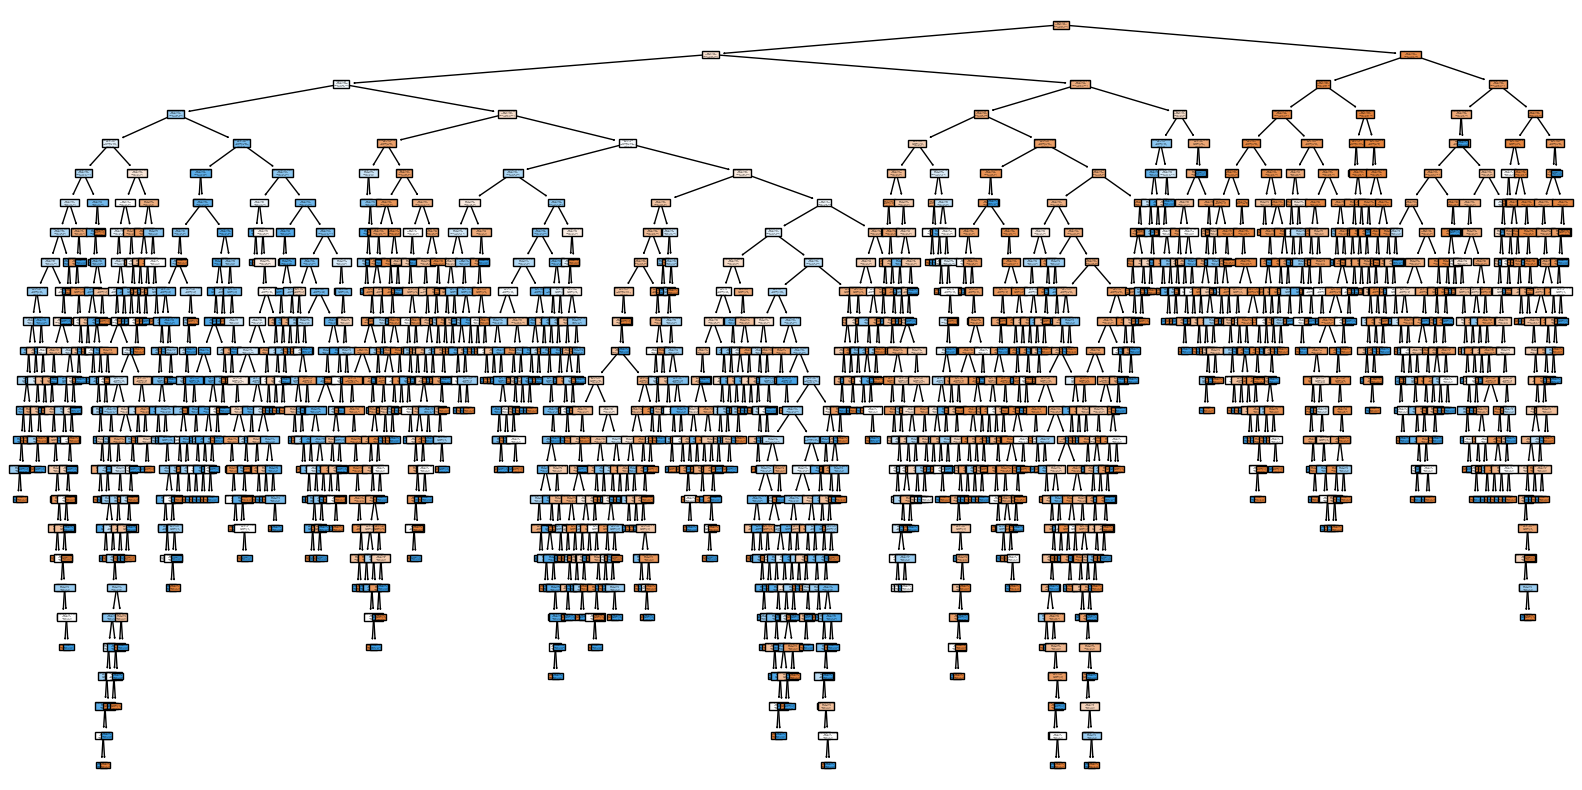

In [69]:
#### Visualize the tree

plt.figure(figsize=(20, 10))
plot_tree(d_tree, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()

#### Apply Post-Pruning (Cost Complexity Pruning)

In [101]:
# Get effective alpha values

path = d_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

- cost_complexity_pruning_path(X_train, y_train): Computes the pruning path, i.e., the effective values of ccp_alpha, which controls tree complexity by pruning weak branches.
- ccp_alphas: Extracts all possible alpha values for pruning.

In [97]:
# Train models with different Alpha values

models = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 42, ccp_alpha = alpha)
    clf.fit(X_train, y_train)
    models.append(clf)

- Iterates through each value in ccp_alphas.
- Creates a DecisionTreeClassifier with a specific ccp_alpha value (higher values lead to more pruning).
- Trains the classifier (fit(X_train, y_train)) and stores it in the models list

In [111]:
# Evaluate the trained models
train_acc = [clf.score(X_train, y_train) for clf in models]
test_acc = [clf.score(X_test, y_test) for clf in models]

- Computes training accuracy for each trained model using score(X_train, y_train), storing it in train_acc.
- Computes testing accuracy using score(X_test, y_test), storing it in test_acc.


This overall purpose of pruning is it helps to evaluate how different pruning levels (ccp_alpha values) impact performance. The goal is to find an optimal alpha that balances overfitting and underfitting - too little pruning may cause overfitting, while excessive pruning may lead to underfitting


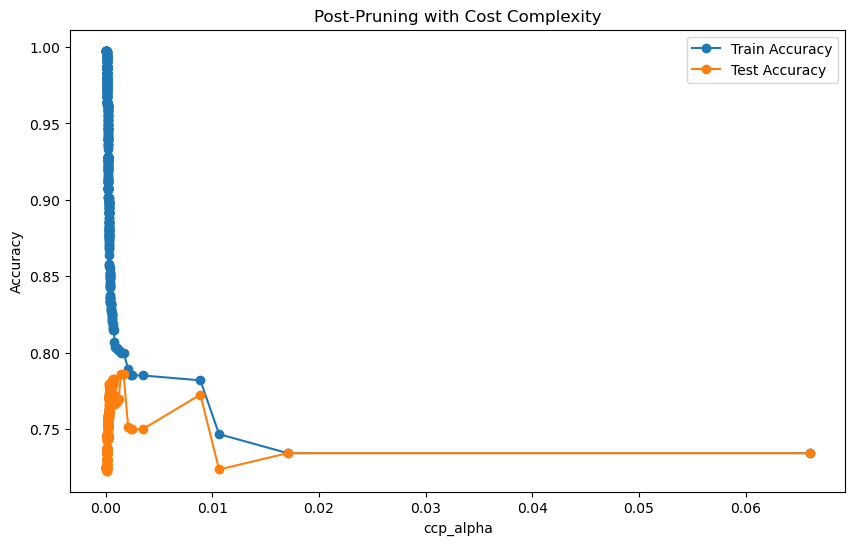

In [117]:
# Plot train vs test accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_acc, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas, test_acc, marker='o', label="Test Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Post-Pruning with Cost Complexity")
plt.show()

#### Select Best Pruned Model

In [120]:
best_alpha = ccp_alphas[np.argmax(test_acc)]
final_model = DecisionTreeClassifier(random_state = 42, ccp_alpha=best_alpha)
final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)
print(y_pred_final)

[0 0 1 ... 0 0 0]


In [122]:
print('Accuracy (After Pruning) : ', accuracy_score(y_test, y_pred_final))

Accuracy (After Pruning) :  0.7860696517412935


In [124]:
print('Classification Report : ', classification_report(y_test, y_pred_final))

Classification Report :                precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

